<a href="https://colab.research.google.com/github/RuiaRui/project_CSM/blob/main/CSM_ML_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipeline

In [ ]:
! pip install bertopic
! pip install pynndescent==0.5
# need restart run this first

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 2.5 MB/s 
     |████████████████████████████████| 5.2 MB 10.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 88 kB 6.7 MB/s 
     |████████████████████████████████| 4.2 MB 27.6 MB/s 
     |████████████████████████████████| 1.2 MB 12.9 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 636 kB 33.6 MB/s 
     |████████████████████████████████| 6.6 MB 45.0 MB/s 
     |████████████████████████████████| 1.1 MB 40.3 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342156 sha256=27c4104bd382a594200fb0620f803894b45e263260a00e28f1688d073ef1176c
  Stored in directory: /root/.cache/p

In [ ]:
import bz2
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm.notebook import tqdm
import dill
import csv

### Load Data

In [ ]:
path=f'/content/drive/MyDrive/CSM_Project/full_data.json.bz2'
df_full=pd.read_json(path)
df_full.head(5)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,original_tweet_id,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username
0,111091623,eilymurphy,Business ELT teacher in France - RTs are not e...,None,1335,1612,4781,2010-02-03 19:53:11.000000,1509682278514970628,2022-04-01 00:01:18.000000,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None
1,1411655223752413184,clayella8585,None,None,52,663,32045,2021-07-04 11:58:41.000000,1509682320630026241,2022-04-01 00:01:28.000000,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None
2,1147634388064186369,FrankPentangel1,Alive and kicking,None,132,98,9779,2019-07-06 22:32:14.000000,1509682449042878464,2022-04-01 00:01:59.000000,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None
3,24756899,Faith4Mishel,"💎 CLASSY, Sassy AND a little 💎 SMART assy! In...","Floriduh, USA",4678,6402,58179,2009-03-16 19:57:53.000000,1509682747018817538,2022-04-01 00:03:10.000000,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None
4,1377044106141171713,chaplainoftruth,Evangelist and a Chaplain for Go Ministry\nLas...,None,229,49,2240,2021-03-30 23:45:04.000000,1509682961377120257,2022-04-01 00:04:01.000000,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None


In [ ]:
df_full['tweetcreatedts']=df_full.tweetcreatedts.apply(pd.to_datetime)
df_full

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,original_tweet_id,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username
0,111091623,eilymurphy,Business ELT teacher in France - RTs are not e...,None,1335,1612,4781,2010-02-03 19:53:11.000000,1509682278514970628,2022-04-01 00:01:18,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None
1,1411655223752413184,clayella8585,None,None,52,663,32045,2021-07-04 11:58:41.000000,1509682320630026241,2022-04-01 00:01:28,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None
2,1147634388064186369,FrankPentangel1,Alive and kicking,None,132,98,9779,2019-07-06 22:32:14.000000,1509682449042878464,2022-04-01 00:01:59,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None
3,24756899,Faith4Mishel,"💎 CLASSY, Sassy AND a little 💎 SMART assy! In...","Floriduh, USA",4678,6402,58179,2009-03-16 19:57:53.000000,1509682747018817538,2022-04-01 00:03:10,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None
4,1377044106141171713,chaplainoftruth,Evangelist and a Chaplain for Go Ministry\nLas...,None,229,49,2240,2021-03-30 23:45:04.000000,1509682961377120257,2022-04-01 00:04:01,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64584,1151684730,RachelMorganPhD,Impact Project Officer @swanseauni | Latin Ame...,"Rhondda, Cymru",8729,7938,2627,2013-02-05 18:50:17.000000,1509676297617920002,2022-03-31 23:37:32,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None
64585,2307337790,coenfrancine,Vice presidente B'nai B'rith France@ B'nai B'r...,marseille,211,52,1559,2014-01-23 22:34:49.000000,1509676341012094986,2022-03-31 23:37:42,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None
64586,404397059,TGEUorg,TGEU is a membership-based organisation workin...,Europe & Central Asia,489,12086,4297,2011-11-03 21:31:37.000000,1509676585141551105,2022-03-31 23:38:40,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None
64587,1228193467,JakubHlavka,Assistant Research Professor @USCPrice @Schaef...,Stand with Ukraine,4996,995,1273,2013-02-28 19:05:52.000000,1509676861785214979,2022-03-31 23:39:46,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64589 entries, 0 to 64588
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   64589 non-null  int64         
 1   username                 64589 non-null  object        
 2   acctdesc                 58907 non-null  object        
 3   location                 47178 non-null  object        
 4   following                64589 non-null  int64         
 5   followers                64589 non-null  int64         
 6   totaltweets              64589 non-null  int64         
 7   usercreatedts            64589 non-null  object        
 8   tweetid                  64589 non-null  int64         
 9   tweetcreatedts           64589 non-null  datetime64[ns]
 10  retweetcount             64589 non-null  int64         
 11  text                     64589 non-null  object        
 12  hashtags                 64589 n

In [ ]:
df_full.text.head(5).apply(print)

Here s the link to our therapeutic tale for #refugee children from #Ukraine. In two language versions  UKR and RUS . PL and ENG translations available. #HelpUkraine  URL  Pleast, please RT
Russian Nobel peace prize winner sells medal to fund for Ukrainian refugees #StopPutin #StandWithUkraine URL
I see #ColmOGorman hasn t volunteered to look after, say, two disabled refugees from #Ukraine. Why not? Surly Colm knows how important it is for Secular Saints to lead from the front. He hasn t refused, has he? URL
#IMMIGRATION #Biden Admin lifts #Trump era #Title42 which W.H. admits will create  influx  of #migrants  URL
A refugee from #Mariupol tells how the AFU #Azov fired at their car with children while they were trying to leave the city. #Ukraine URL


0    None
1    None
2    None
3    None
4    None
Name: text, dtype: object

## Sentimental Analysis - ROBERTa-twitter

In [ ]:
! pip install transformers
! pip install sentencepiece

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import urllib.request
from scipy.special import softmax

In [ ]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [ ]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)


Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [ ]:
model = model.to(device)

In [ ]:
tensors = []
for tweet in tqdm(df_full.text):
    encoded_input = tokenizer(tweet, return_tensors='pt').to("cuda:0")
    output = model(**encoded_input)
    tensors.append(output[0][0].detach())

  0%|          | 0/64589 [00:00<?, ?it/s]

In [ ]:
tweets_scores = []
for t in tensors:
    scores = t.cpu().numpy()
    scores = softmax(scores)
    tweets_scores.append(scores)

In [ ]:
df_full['score']=tweets_scores

In [ ]:
df_full['negative_sentiment'] = [x[0] for x in df_full['score']]
df_full['neutral_sentiment'] = [x[1] for x in df_full['score']]
df_full['positive_sentiment'] = [x[2] for x in df_full['score']]
df_full['max_sentiment'] = [labels[np.argmax(x)] for x in df_full['score']]


In [ ]:
df_sentiment = df_full[['tweetid','text','tweetcreatedts','location','hashtags','coordinates','score','max_sentiment','negative_sentiment','neutral_sentiment','positive_sentiment']]
df_sentiment.head(10)

,tweetid,text,tweetcreatedts,location,hashtags,coordinates,score,max_sentiment,negative_sentiment,neutral_sentiment,positive_sentiment
0,1509682278514970628,Here s the link to our therapeutic tale for #r...,2022-04-01 00:01:18,None,"[{'text': 'refugee', 'indices': [62, 70]}, {'t...",None,"[0.03245182, 0.7045272, 0.263021]",neutral,0.032452,0.704527,0.263021
1,1509682320630026241,Russian Nobel peace prize winner sells medal t...,2022-04-01 00:01:28,None,"[{'text': 'StopPutin', 'indices': [90, 100]}, ...",None,"[0.32782963, 0.6390246, 0.033145748]",neutral,0.327830,0.639025,0.033146
2,1509682449042878464,I see #ColmOGorman hasn t volunteered to look ...,2022-04-01 00:01:59,None,"[{'text': 'ColmOGorman', 'indices': [6, 18]}, ...",None,"[0.5628299, 0.40572208, 0.03144796]",negative,0.562830,0.405722,0.031448
3,1509682747018817538,#IMMIGRATION #Biden Admin lifts #Trump era #Ti...,2022-04-01 00:03:10,"Floriduh, USA","[{'text': 'IMMIGRATION', 'indices': [0, 12]}, ...",None,"[0.14866996, 0.7311173, 0.12021264]",neutral,0.148670,0.731117,0.120213
4,1509682961377120257,A refugee from #Mariupol tells how the AFU #Az...,2022-04-01 00:04:01,None,"[{'text': 'Mariupol', 'indices': [33, 42]}, {'...",None,"[0.785562, 0.20906815, 0.0053699417]",negative,0.785562,0.209068,0.005370
5,1509683141841096718,I m on a longer assignment in #Warsaw #Poland ...,2022-04-01 00:04:44,None,"[{'text': 'Warsaw', 'indices': [47, 54]}, {'te...",None,"[0.46412823, 0.45448253, 0.08138933]",negative,0.464128,0.454483,0.081389
6,1509684253939970051,Here is a very emotional thank you video fro...,2022-04-01 00:09:09,Комната,"[{'text': 'Ukrainian', 'indices': [67, 77]}, {...",None,"[0.01120699, 0.16306007, 0.825733]",positive,0.011207,0.163060,0.825733
7,1509684283237089282,THE HUMAN COST OF WAR As conflict escalates i...,2022-04-01 00:09:16,"New York, Los Angeles","[{'text': 'Ukraine', 'indices': [52, 60]}]",None,"[0.31164145, 0.5444201, 0.14393847]",neutral,0.311641,0.544420,0.143938
8,1509685234131898377,VerstyukIvan .. Great News from the Taprooms ...,2022-04-01 00:13:03,None,"[{'text': 'Ukraine', 'indices': [151, 159]}]",None,"[0.005130474, 0.0907974, 0.9040722]",positive,0.005130,0.090797,0.904072
9,1509685341120311300,Next 9 April the EU will become one with #Ukr...,2022-04-01 00:13:28,"Canberra, Australia","[{'text': 'Ukraine', 'indices': [44, 52]}, {'t...",None,"[0.004674135, 0.55220413, 0.44312188]",neutral,0.004674,0.552204,0.443122


In [ ]:
df_sentiment.to_json('/content/drive/MyDrive/CSM_Project/full_data_sentiment.json.bz2')

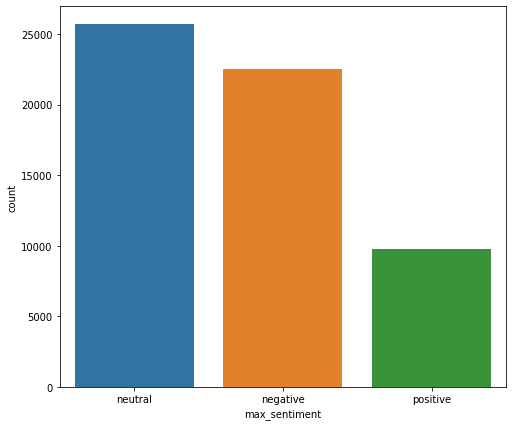

In [ ]:
plt.figure(figsize = (8,7))
sns.countplot(x="max_sentiment", data=df_sentiment.drop_duplicates(subset=['text']))

In [ ]:
df_full.text.loc[328]

'This morning, I thanked President  sandumaiamd for the way the Republic of Moldova handles the refugee crisis, for the benefit of the entire continent.  Our thanks, of the  Europarl EN, also go to the citizens of Moldova, who have warmly helped the refugees from #Ukraine. 1 2 URL'

In [ ]:
df_full.max_sentiment.loc[328]

'positive'

In [ ]:
for t in df_full[df_full['max_sentiment']=='negative'].text.head(10):
  print(t)
  print('\n')

I see #ColmOGorman hasn t volunteered to look after, say, two disabled refugees from #Ukraine. Why not? Surly Colm knows how important it is for Secular Saints to lead from the front. He hasn t refused, has he? URL


A refugee from #Mariupol tells how the AFU #Azov fired at their car with children while they were trying to leave the city. #Ukraine URL


I m on a longer assignment in #Warsaw #Poland covering refugees from #ukraine. Opened my suitcase to letters from my kids  to be opened through my stay here. A reminder of the importance of home to carry me on this heartbreaking story of millions losing their homes in this war URL


  Because is a landlocked country WITHOUT a navy, nuclear bombs, etc. Because is neutral Because accepts Ukrainian refugees Because Armenians help Ukrainians Because Artsakh send 140 tons of humanitarian aid Because this is FAKE NEWS  #Ukraine #Armenia URL


Anyone saying that the #Ukraine conflict started in Feb is either lying or is clueless. The world has

## BERTopic

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=200, 
                        metric='euclidean', 
                        cluster_selection_method='eom', 
                        prediction_data=True, 
                        min_samples=5)

vectorizer_model = CountVectorizer(ngram_range=(1, 2), 
                                   stop_words="english", 
                                   min_df=10, 
                                   max_df=0.95)

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(verbose=True,
                 embedding_model='all-mpnet-base-v2', 
                 vectorizer_model=vectorizer_model,
                 hdbscan_model=hdbscan_model,
                 calculate_probabilities=False,
                 min_topic_size=100,
                 nr_topics="auto")

In [ ]:
topics, probs = topic_model.fit_transform(df_full.text)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/2019 [00:00<?, ?it/s]

2022-06-08 21:18:36,704 - BERTopic - Transformed documents to Embeddings
2022-06-08 21:20:27,685 - BERTopic - Reduced dimensionality
2022-06-08 21:20:34,294 - BERTopic - Clustered reduced embeddings
2022-06-08 21:20:47,440 - BERTopic - Reduced number of topics from 50 to 27


In [ ]:
topics_df=topic_model.get_topic_info()
topics_df.to_json('/content/drive/MyDrive/CSM_Project/topics.json')
topics_df

,Topic,Count,Name
0,0,24052,0_uk_eu_borders_government
1,-1,20924,-1_eu_nato_food_civilians
2,1,2536,1_racism_white_black_african
3,2,2495,2_fled ukraine_million people_million refugees...
4,3,1602,3_donation_supplies_donated_donating
5,4,1450,4_child_unicef_women children_men
6,5,1366,5_biden_potus_100 00_president
7,6,835,6_music_song_raise_raised
8,7,824,7_israel_jewish_israeli_jews
9,8,813,8_animals_cat_pet_dog


In [ ]:
topic_model.visualize_topics()

In [ ]:
fig = topic_model.visualize_barchart(top_n_topics=20)
fig.write_html("/content/drive/MyDrive/CSM_Project/topic_word_score.html")
fig

In [ ]:
topic_model.save('/content/drive/MyDrive/CSM_Project/bert_topic_model')

In [ ]:
model_load = BERTopic.load('/content/drive/MyDrive/CSM_Project/bert_topic_model')

In [ ]:
model_load.get_topic_info()

,Topic,Count,Name
0,0,24052,0_uk_eu_borders_government
1,-1,20924,-1_eu_nato_food_civilians
2,1,2536,1_racism_white_black_african
3,2,2495,2_fled ukraine_million people_million refugees...
4,3,1602,3_donation_supplies_donated_donating
5,4,1450,4_child_unicef_women children_men
6,5,1366,5_biden_potus_100 00_president
7,6,835,6_music_song_raise_raised
8,7,824,7_israel_jewish_israeli_jews
9,8,813,8_animals_cat_pet_dog


In [ ]:
timestamps=df_full.tweetcreatedts.apply(pd.to_datetime).dt.date
timestamps

0        2022-04-01
1        2022-04-01
2        2022-04-01
3        2022-04-01
4        2022-04-01
            ...    
64584    2022-03-31
64585    2022-03-31
64586    2022-03-31
64587    2022-03-31
64588    2022-03-31
Name: tweetcreatedts, Length: 64589, dtype: object

In [ ]:
topics_over_time = topic_model.topics_over_time(df_full.text,topics,timestamps)


89it [00:11,  8.01it/s]


In [ ]:
topics_over_time

,Topic,Words,Frequency,Timestamp,Name
0,-1,"prepared, welcome, eu, russiaukraineconflict, ...",78,2022-02-24,-1_eu_nato_food_civilians
1,0,"hungary, preparing, government, eu, uk",96,2022-02-24,0_uk_eu_borders_government
2,1,"creates, comments, racism, asylum, white",7,2022-02-24,1_racism_white_black_african
3,2,"russia invasion, prepare, receive, refugee age...",14,2022-02-24,2_fled ukraine_million people_million re...
4,3,"base, partnership, ukraine donate, sell, aid u...",2,2022-02-24,3_donation_supplies_donated_donating
...,...,...,...,...,...
2258,16,"project, ukraine looking, artists, rescueorg, ...",3,2022-05-23,16_art_proceeds_artist_artists
2259,17,"missed, identify, unhcr url, amnesty, strategy",2,2022-05-23,17_podcast_listen_episode_latest
2260,18,"planning, men, care, url really, representatives",5,2022-05-23,18_standupforukraine_stand_glblctzn_supp...
2261,20,"leave homes, care ukrainian, forced leave, ref...",1,2022-05-23,20_medical_health_hospital_field


In [ ]:

fig = topic_model.visualize_topics_over_time(topics_over_time)
fig.write_html("/content/drive/MyDrive/CSM_Project/topic_over_time.html")
fig

In [ ]:
df_full['topics']=topics
df_full.head(5)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,score,negative_sentiment,neutral_sentiment,positive_sentiment,max_sentiment,topics
0,111091623,eilymurphy,Business ELT teacher in France - RTs are not e...,None,1335,1612,4781,2010-02-03 19:53:11.000000,1509682278514970628,2022-04-01 00:01:18,...,NaN,NaN,NaN,None,"[0.03245182, 0.7045272, 0.263021]",0.032452,0.704527,0.263021,neutral,24
1,1411655223752413184,clayella8585,None,None,52,663,32045,2021-07-04 11:58:41.000000,1509682320630026241,2022-04-01 00:01:28,...,NaN,NaN,NaN,None,"[0.32782963, 0.6390246, 0.033145748]",0.327830,0.639025,0.033146,neutral,-1
2,1147634388064186369,FrankPentangel1,Alive and kicking,None,132,98,9779,2019-07-06 22:32:14.000000,1509682449042878464,2022-04-01 00:01:59,...,NaN,NaN,NaN,None,"[0.5628299, 0.40572208, 0.03144796]",0.562830,0.405722,0.031448,negative,0
3,24756899,Faith4Mishel,"💎 CLASSY, Sassy AND a little 💎 SMART assy! In...","Floriduh, USA",4678,6402,58179,2009-03-16 19:57:53.000000,1509682747018817538,2022-04-01 00:03:10,...,NaN,NaN,NaN,None,"[0.14866996, 0.7311173, 0.12021264]",0.148670,0.731117,0.120213,neutral,0
4,1377044106141171713,chaplainoftruth,Evangelist and a Chaplain for Go Ministry\nLas...,None,229,49,2240,2021-03-30 23:45:04.000000,1509682961377120257,2022-04-01 00:04:01,...,NaN,NaN,NaN,None,"[0.785562, 0.20906815, 0.0053699417]",0.785562,0.209068,0.005370,negative,10


In [ ]:
df_sentiment['topic'] = topics
df_sentiment.head()


,tweetid,text,tweetcreatedts,location,hashtags,coordinates,score,max_sentiment,negative_sentiment,neutral_sentiment,positive_sentiment,topic
0,1509682278514970628,Here s the link to our therapeutic tale for #r...,2022-04-01 00:01:18,None,"[{'text': 'refugee', 'indices': [62, 70]}, {'t...",None,"[0.03245182, 0.7045272, 0.263021]",neutral,0.032452,0.704527,0.263021,24
1,1509682320630026241,Russian Nobel peace prize winner sells medal t...,2022-04-01 00:01:28,None,"[{'text': 'StopPutin', 'indices': [90, 100]}, ...",None,"[0.32782963, 0.6390246, 0.033145748]",neutral,0.327830,0.639025,0.033146,-1
2,1509682449042878464,I see #ColmOGorman hasn t volunteered to look ...,2022-04-01 00:01:59,None,"[{'text': 'ColmOGorman', 'indices': [6, 18]}, ...",None,"[0.5628299, 0.40572208, 0.03144796]",negative,0.562830,0.405722,0.031448,0
3,1509682747018817538,#IMMIGRATION #Biden Admin lifts #Trump era #Ti...,2022-04-01 00:03:10,"Floriduh, USA","[{'text': 'IMMIGRATION', 'indices': [0, 12]}, ...",None,"[0.14866996, 0.7311173, 0.12021264]",neutral,0.148670,0.731117,0.120213,0
4,1509682961377120257,A refugee from #Mariupol tells how the AFU #Az...,2022-04-01 00:04:01,None,"[{'text': 'Mariupol', 'indices': [33, 42]}, {'...",None,"[0.785562, 0.20906815, 0.0053699417]",negative,0.785562,0.209068,0.005370,10


In [ ]:
df_full['tweetcreatedts'] = df_full['tweetcreatedts'].astype(str)
df_full.to_json("/content/drive/MyDrive/CSM_Project/tweet_full_done.json.bz2")
df_sentiment['tweetcreatedts'] = df_sentiment['tweetcreatedts'].astype(str)
df_sentiment.to_json('/content/drive/MyDrive/CSM_Project/tweet_full_done_filter.json.bz2')

# Analysis

In [ ]:
df_result = pd.read_json('/content/drive/MyDrive/CSM_Project/tweet_full_done_filter.json.bz2')
df_result.head()

,tweetid,text,tweetcreatedts,location,hashtags,coordinates,score,max_sentiment,negative_sentiment,neutral_sentiment,positive_sentiment,topic
0,1509682278514970628,Here s the link to our therapeutic tale for #r...,2022-04-01 00:01:18,None,"[{'text': 'refugee', 'indices': [62, 70]}, {'t...",None,"[0.0324518196, 0.7045271993000001, 0.263020992...",neutral,0.032452,0.704527,0.263021,24
1,1509682320630026241,Russian Nobel peace prize winner sells medal t...,2022-04-01 00:01:28,None,"[{'text': 'StopPutin', 'indices': [90, 100]}, ...",None,"[0.32782962920000003, 0.6390246153, 0.03314574...",neutral,0.327830,0.639025,0.033146,-1
2,1509682449042878464,I see #ColmOGorman hasn t volunteered to look ...,2022-04-01 00:01:59,None,"[{'text': 'ColmOGorman', 'indices': [6, 18]}, ...",None,"[0.5628299117000001, 0.4057220817, 0.0314479582]",negative,0.562830,0.405722,0.031448,0
3,1509682747018817538,#IMMIGRATION #Biden Admin lifts #Trump era #Ti...,2022-04-01 00:03:10,"Floriduh, USA","[{'text': 'IMMIGRATION', 'indices': [0, 12]}, ...",None,"[0.1486699581, 0.7311173081, 0.1202126369]",neutral,0.148670,0.731117,0.120213,0
4,1509682961377120257,A refugee from #Mariupol tells how the AFU #Az...,2022-04-01 00:04:01,None,"[{'text': 'Mariupol', 'indices': [33, 42]}, {'...",None,"[0.7855619788, 0.2090681493, 0.0053699417]",negative,0.785562,0.209068,0.005370,10


In [ ]:
df_result['date']=df_result.tweetcreatedts.apply(pd.to_datetime).dt.date

In [ ]:
df_senti_date=df_result.groupby(['date'])['negative_sentiment','neutral_sentiment','positive_sentiment'].mean()
df_senti_date['sentiment'] = df_senti_date.positive_sentiment - df_senti_date.negative_sentiment
df_senti_date.reset_index(inplace=True)
df_senti_date

,date,negative_sentiment,neutral_sentiment,positive_sentiment,sentiment
0,2022-02-24,0.363341,0.495333,0.141326,-0.222014
1,2022-02-25,0.351730,0.452206,0.196063,-0.155667
2,2022-02-26,0.405588,0.409153,0.185260,-0.220328
3,2022-02-27,0.386679,0.434697,0.178624,-0.208055
4,2022-02-28,0.386340,0.429414,0.184246,-0.202095
...,...,...,...,...,...
84,2022-05-19,0.321757,0.445823,0.232420,-0.089338
85,2022-05-20,0.328604,0.451285,0.220110,-0.108494
86,2022-05-21,0.384112,0.399910,0.215979,-0.168133
87,2022-05-22,0.364583,0.461873,0.173544,-0.191039


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(df_senti_date, x='date', y="sentiment")
fig.update_layout(title='Average Sentiments over time',
                    xaxis_title="Date",
                    yaxis_title="Sentiment index",)
fig.show()


In [ ]:
fig.write_html("/content/drive/MyDrive/CSM_Project/result/sentiment_over_time.html")

In [ ]:
# fig = go.Figure(layout_xaxis_range=[2007,2021])
fig = go.Figure(layout_yaxis_range=[-1,1])
colors = px.colors.qualitative.G10 + px.colors.qualitative.Antique + px.colors.qualitative.Vivid
fig.add_traces(go.Scatter(x=df_senti_date['date'], y = df_senti_date['senti'], name='all_topic_average', marker=dict(
        color=colors[0])))


for index, row in topics_df[['Topic','Name']].iterrows():
    df_temp = df_result[df_result['topic']==row['Topic']]

    df_temp=df_temp.groupby(['date'])['negative_sentiment','neutral_sentiment','positive_sentiment'].mean()
    df_temp['senti'] = df_temp.positive_sentiment - df_temp.negative_sentiment
    df_temp.reset_index(inplace=True)

    fig.add_traces(go.Scatter(x=df_temp['date'], y = df_temp['senti'], name=row['Name'], marker=dict(
        color=colors[index+1]), visible='legendonly'
        ))
    
fig.update_layout(height=int(600))
fig.update_layout(title='Topic sentiments over time',
                    xaxis_title="Date",
                    yaxis_title="Sentiment index",)
fig.show()

In [ ]:
fig.write_html("/content/drive/MyDrive/CSM_Project/result/topic_sentiment_over_time.html")

In [ ]:
df_senti_topic=df_result.groupby(['topic'])['negative_sentiment','neutral_sentiment','positive_sentiment'].mean()
df_senti_topic['sentiment'] = df_senti_topic.positive_sentiment - df_senti_topic.negative_sentiment
df_senti_topic.reset_index(inplace=True)
df_senti_topic=pd.merge(df_senti_topic,topics_df,left_on='topic',right_on='Topic')


fig = px.bar(df_senti_topic, x='topic', y='sentiment',
             hover_data=['Count', 'Name'], 
             labels={'pop':'sentiment Index'}, height=400)
fig.update_layout(title='Topic Sentiments Overall',
                    xaxis_title="Topic",
                    yaxis_title="Sentiment index",)
fig.show()
fig.write_html("/content/drive/MyDrive/CSM_Project/result/topic_sentiment.html")

In [ ]:
df_result.location.notna().value_counts()

True     47178
False    17411
Name: location, dtype: int64

In [ ]:
df_result.location.dropna().value_counts()

London                            878
London, England                   777
Ukraine                           629
Washington, DC                    615
United States                     584
                                 ... 
Vienna &at large across the EU      1
UK and International                1
New Milford, NJ                     1
Aus Paderborn ✌🏼🤘🏼                  1
Lake Charles, LA                    1
Name: location, Length: 12517, dtype: int64

## HashTags

In [ ]:
def load_json(str):
    str = str.replace("\'", "\"")
    obj=json.loads(str)
    hashtags=[]
    for i in obj:
        # lower case of all hashtags
        hashtags.append(i['text'].lower())
    return hashtags



df_result['hashtag']=df_result.hashtags.apply(load_json)
df_hashtags=df_result.explode('hashtag')

In [ ]:
df_hashtags['sentiment']=df_hashtags.positive_sentiment - df_hashtags.negative_sentiment
df_senti_hashtags=df_hashtags.groupby(['hashtag'])['sentiment'].agg(['count','mean'])
df_senti_hashtags.reset_index(inplace=True)
df_senti_hashtags.sort_values(by='count',ascending=False,inplace=True)

In [ ]:
fig = px.bar(df_senti_hashtags.head(30), x='hashtag', y='mean',
             hover_data=['count'], 
             labels={'pop':'sentiment Index'}, height=400)
fig.update_layout(title='Topic Sentiments Overall',
                    xaxis_title="Hashtag",
                    yaxis_title="Sentiment index",)
fig.show()
fig.write_html("/content/drive/MyDrive/CSM_Project/result/hashtag_sentiment.html")

## WordCloud

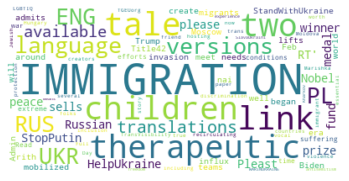

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.add('Ukraine')
stopwords.add('Ukrainian')
stopwords.add('URL')
stopwords.add("URL'")
stopwords.add('refugee')
stopwords.add('refugees')

text = df_result[df_result['max_sentiment'] == 'neutral'].text.values
wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

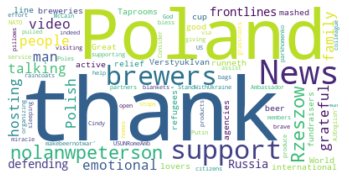

In [ ]:
text = df_result[df_result['max_sentiment'] == 'positive'].text.values
wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

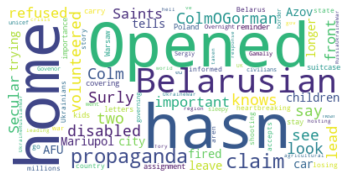

In [ ]:
text = df_result[df_result['max_sentiment'] == 'negative'].text.values
wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()